<a href="https://colab.research.google.com/github/Seenuprime/Data-Analytics/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [ ]:
!kaggle datasets download -d alfathterry/telco-customer-churn-11-1-3

Dataset URL: https://www.kaggle.com/datasets/alfathterry/telco-customer-churn-11-1-3
License(s): MIT
  0% 0.00/513k [00:00<?, ?B/s]
100% 513k/513k [00:00<00:00, 82.3MB/s]


In [ ]:
import zipfile

zip_dir = zipfile.ZipFile('/content/telco-customer-churn-11-1-3.zip')
zip_dir.extractall()
zip_dir.close()

In [ ]:
df = pd.read_csv(r'telco.csv')
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [ ]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

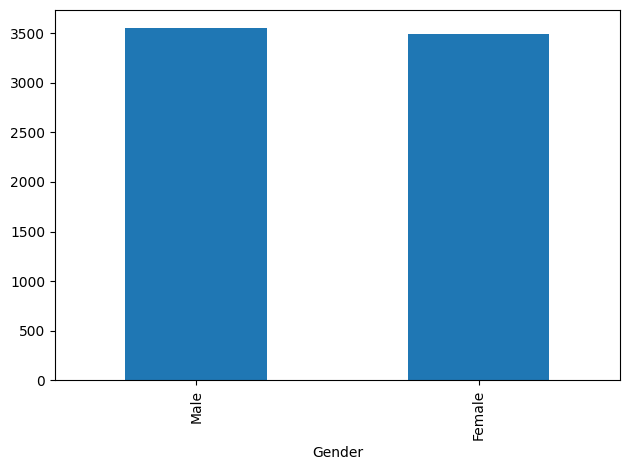

In [ ]:
df.Gender.value_counts().plot(kind='bar')
plt.tight_layout()

In [108]:
hist, bin_edges = np.histogram(df.Age, 20)
hist, bin_edges

(array([524, 393, 366, 365, 379, 375, 415, 379, 395, 418, 361, 384, 385,
        380, 382, 203, 232, 211, 219, 277]),
 array([19.  , 22.05, 25.1 , 28.15, 31.2 , 34.25, 37.3 , 40.35, 43.4 ,
        46.45, 49.5 , 52.55, 55.6 , 58.65, 61.7 , 64.75, 67.8 , 70.85,
        73.9 , 76.95, 80.  ]))

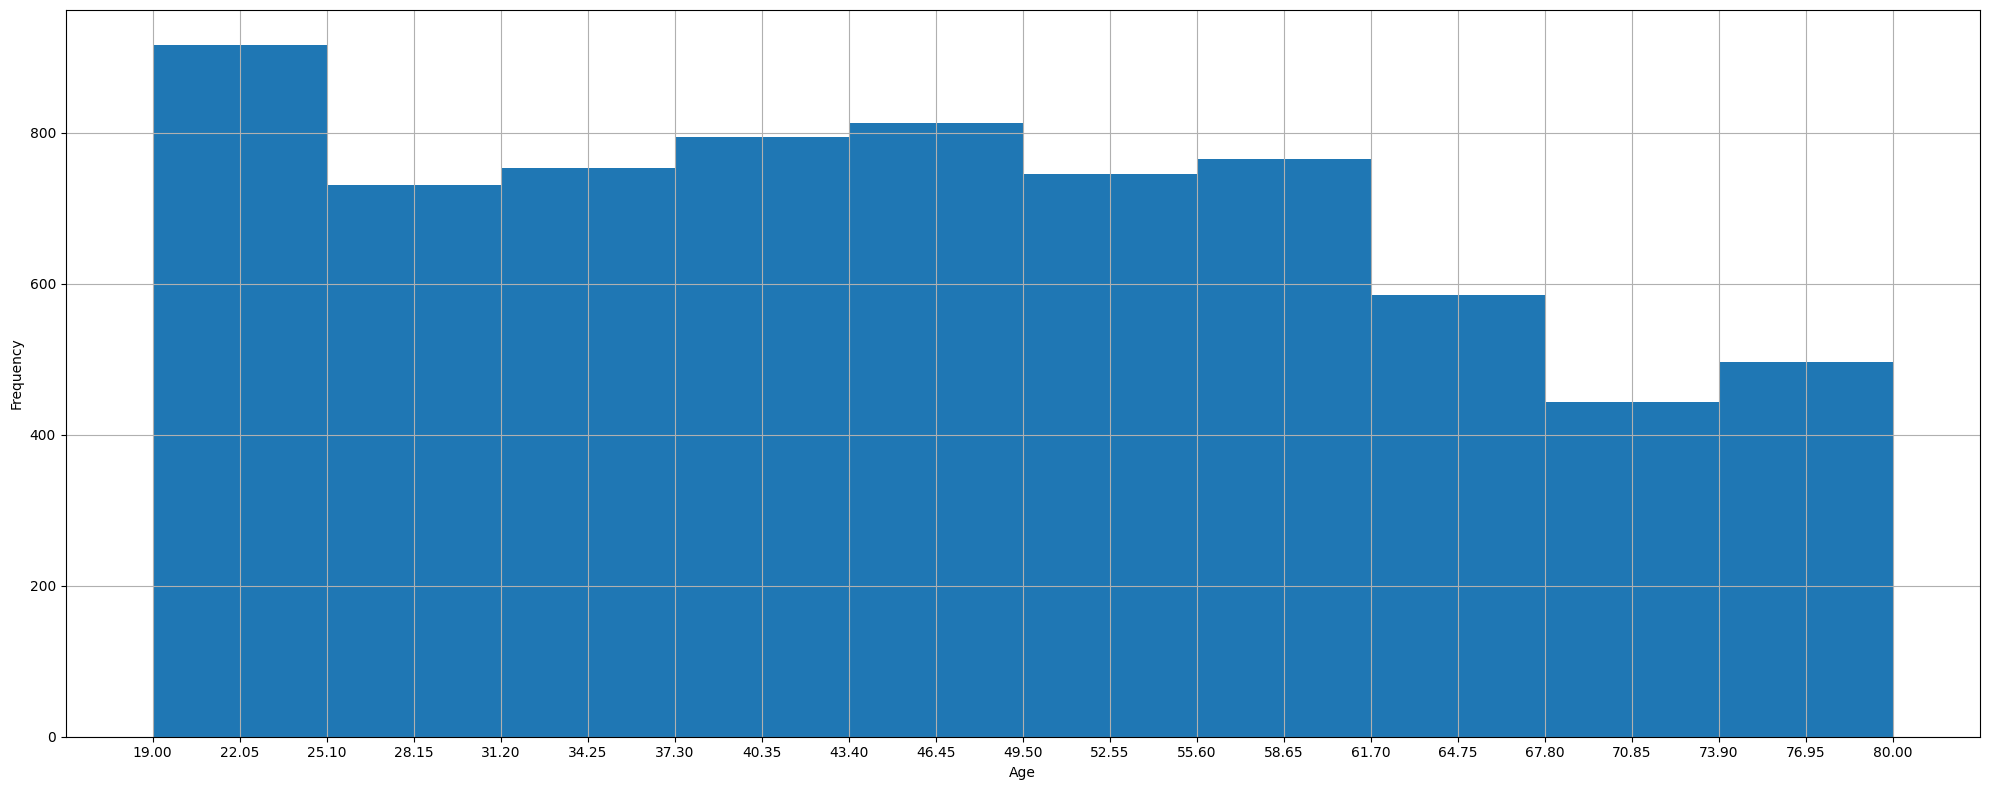

In [87]:
plt.figure(figsize=(20, 8))
plt.grid()
df['Age'].plot(kind='hist', xticks=bin_edges, grid=True)
plt.xlabel('Age')
plt.tight_layout()

In [96]:
df['Senior Citizen'].value_counts()

,count
Senior Citizen,
No,5901
Yes,1142


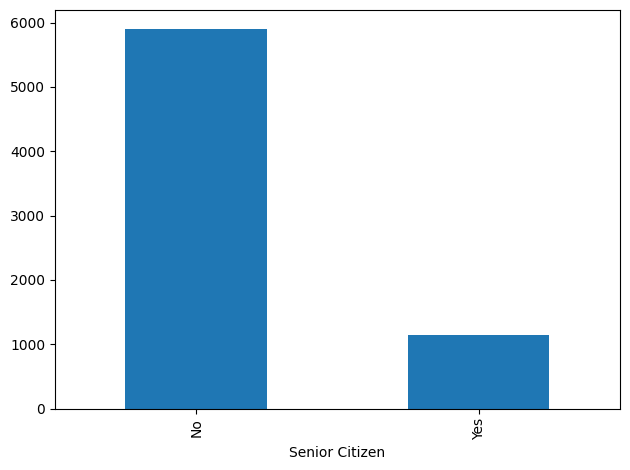

In [95]:
df['Senior Citizen'].value_counts().plot(kind='bar')
plt.tight_layout()

In [99]:
df.Married.value_counts()

,count
Married,
No,3641
Yes,3402


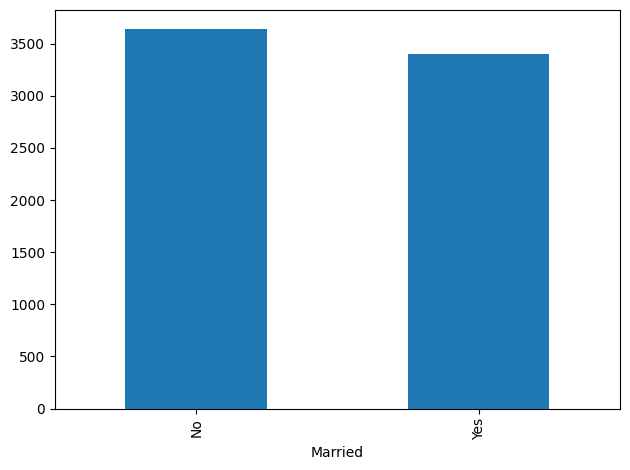

In [100]:
df.Married.value_counts().plot(kind='bar')
plt.tight_layout()

In [115]:
num_depe = np.histogram(df['Number of Dependents'])
num_depe

(array([5416,  553,  531,  517,    9,   10,    3,    2,    1,    1]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]))

Text(0.5, 58.7222222222222, 'Dependencies')

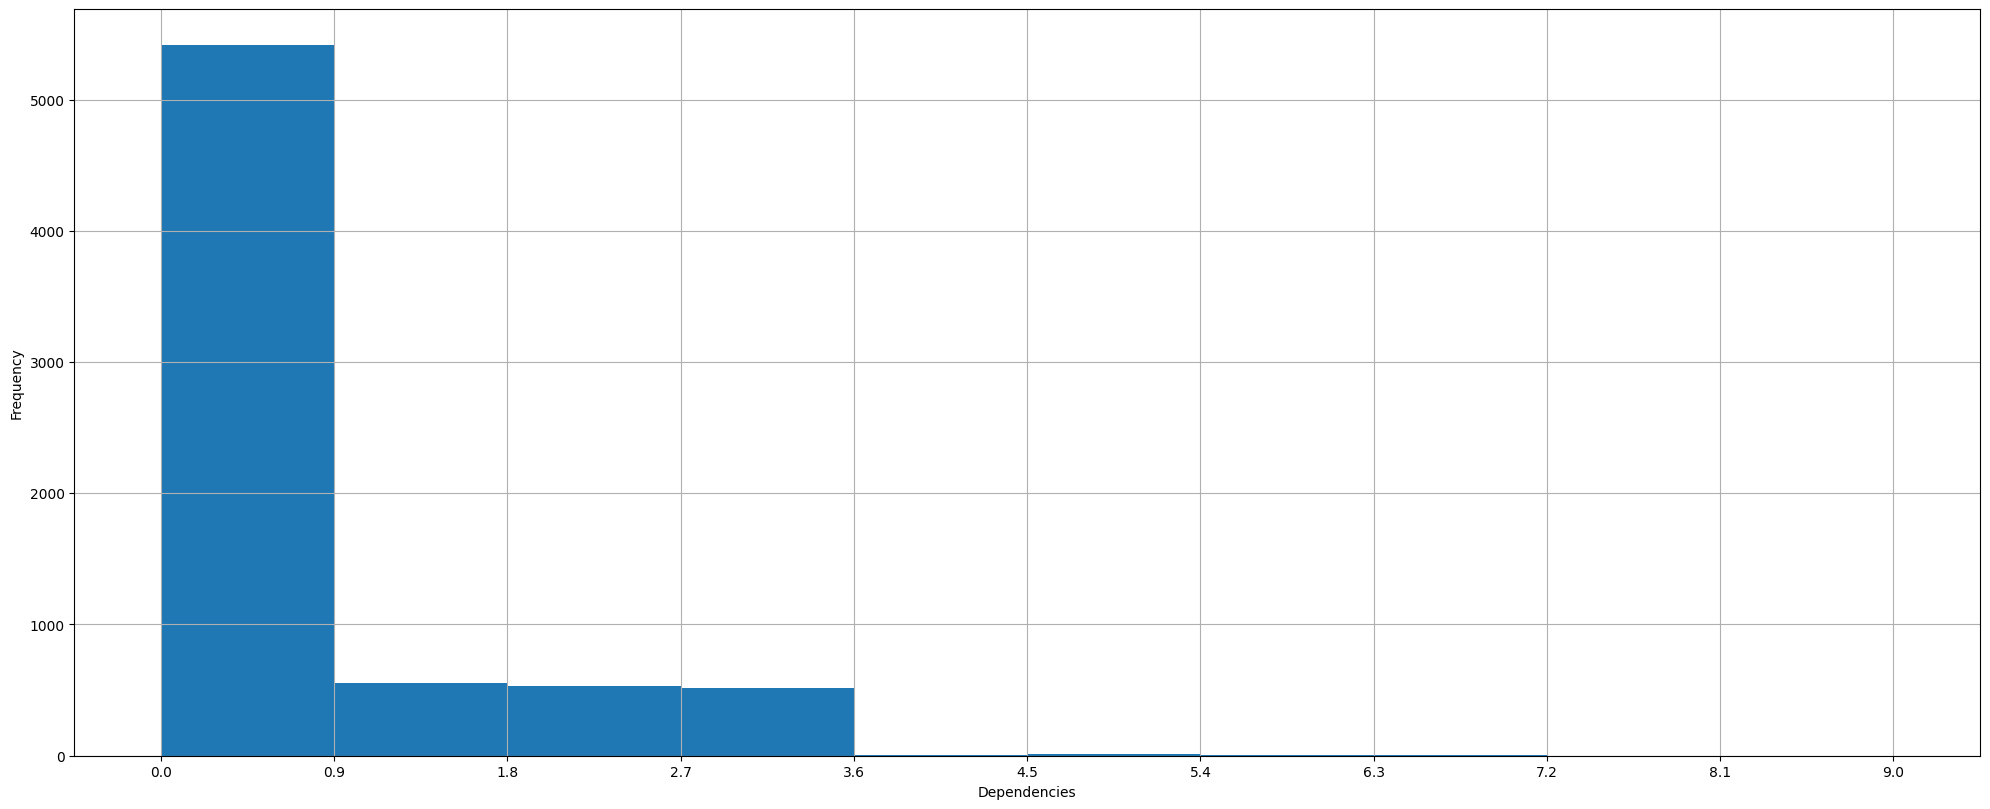

In [116]:
plt.figure(figsize=(20, 8))
df['Number of Dependents'].plot(kind='hist', xticks=num_depe[1], grid=True)
plt.tight_layout()
plt.xlabel('Dependencies')